## tashu 데이터를 가지고 1시간 단위로 대여건수를 합하여 요일별 시간대별 heatmap 그리기

In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [24]:
df_tashu = pd.read_csv('../data/tashu.csv')
df_tashu

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43,20130101055603,34,20130101060217
1,2,20130101060406,10,20130101061859
2,106,20130101105305,105,20130101105743
3,4,20130101112223,4,20130101121753
4,21,20130101113953,105,20130101114943
5,90,20130101120833,91,20130101125136
6,13,20130101131429,30,20130101133039
7,1,20130101133742,1,20130101133815
8,1,20130101133813,2,20130101150958
9,1,20130101133847,2,20130101151014


In [5]:
df_tashu['RENT_DATE'] = df_tashu['RENT_DATE']\
                        .apply(lambda x: datetime.datetime\
                               .strptime(str(x), '%Y%m%d%H%M%S'))
df_tashu

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43,2013-01-01 05:56:03,34,20130101060217
1,2,2013-01-01 06:04:06,10,20130101061859
2,106,2013-01-01 10:53:05,105,20130101105743
3,4,2013-01-01 11:22:23,4,20130101121753
4,21,2013-01-01 11:39:53,105,20130101114943
5,90,2013-01-01 12:08:33,91,20130101125136
6,13,2013-01-01 13:14:29,30,20130101133039
7,1,2013-01-01 13:37:42,1,20130101133815
8,1,2013-01-01 13:38:13,2,20130101150958
9,1,2013-01-01 13:38:47,2,20130101151014


In [6]:
df_tashu['WEEKDAY'] = df_tashu['RENT_DATE'].dt.dayofweek
df_tashu['HOUR'] = df_tashu['RENT_DATE'].dt.hour
df_tashu

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE,WEEKDAY,HOUR
0,43,2013-01-01 05:56:03,34,20130101060217,1,5
1,2,2013-01-01 06:04:06,10,20130101061859,1,6
2,106,2013-01-01 10:53:05,105,20130101105743,1,10
3,4,2013-01-01 11:22:23,4,20130101121753,1,11
4,21,2013-01-01 11:39:53,105,20130101114943,1,11
5,90,2013-01-01 12:08:33,91,20130101125136,1,12
6,13,2013-01-01 13:14:29,30,20130101133039,1,13
7,1,2013-01-01 13:37:42,1,20130101133815,1,13
8,1,2013-01-01 13:38:13,2,20130101150958,1,13
9,1,2013-01-01 13:38:47,2,20130101151014,1,13


In [21]:
df_rent = pd.DataFrame()
for i in range(0,7):
    temp = df_tashu.loc[df_tashu['WEEKDAY'] == i]
    df_rent[str(i)] = temp.groupby(['HOUR']).count()['RENT_STATION']
df_rent

,0,1,2,3,4,5,6
HOUR,,,,,,,
0,8605,9078.0,8023.0,9037,8767.0,10117.0,9331.0
1,1907,1937.0,1662.0,2006,1831.0,2693.0,3119.0
2,16,19.0,15.0,42,21.0,23.0,62.0
3,1,NaN,NaN,2,NaN,NaN,NaN
4,2,NaN,2.0,1,1.0,5.0,NaN
5,2371,2142.0,2135.0,2448,2406.0,2909.0,2082.0
6,3232,3473.0,3176.0,3586,3461.0,2930.0,2198.0
7,18918,20306.0,19570.0,19947,19377.0,15562.0,15132.0
8,27880,29847.0,29375.0,29803,29001.0,21387.0,18626.0


In [22]:
df_rent.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_rent = df_rent.fillna(0).astype(int)
df_rent

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
HOUR,,,,,,,
0,8605,9078,8023,9037,8767,10117,9331
1,1907,1937,1662,2006,1831,2693,3119
2,16,19,15,42,21,23,62
3,1,0,0,2,0,0,0
4,2,0,2,1,1,5,0
5,2371,2142,2135,2448,2406,2909,2082
6,3232,3473,3176,3586,3461,2930,2198
7,18918,20306,19570,19947,19377,15562,15132
8,27880,29847,29375,29803,29001,21387,18626


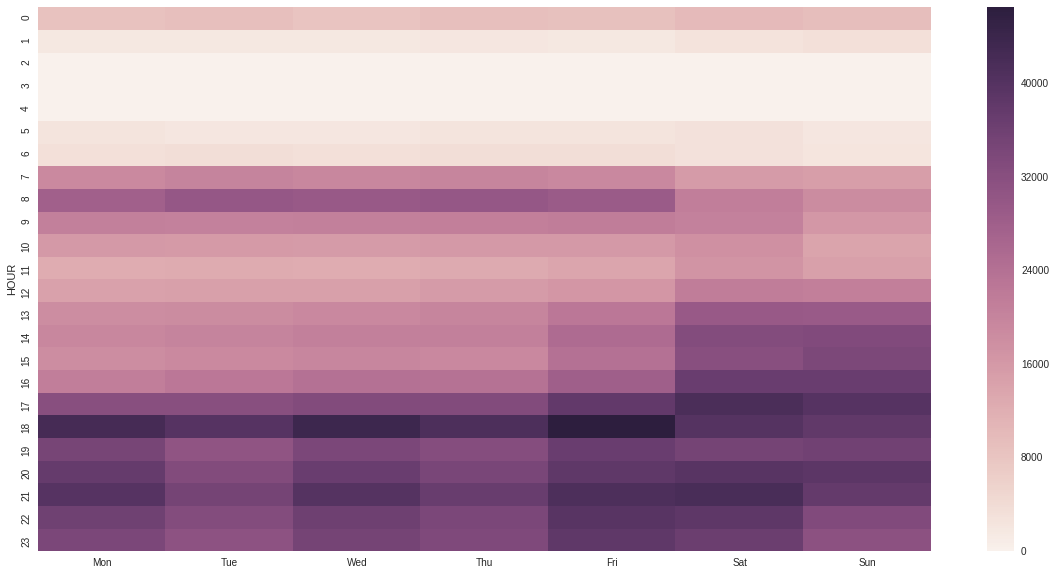

In [23]:
f = plt.figure(figsize=(20,10))
ax = sns.heatmap(df_rent, ax=f.gca())
plt.show(ax)

## Hive에서 총 대여건수 Top 5를 구하는 Query

In [ ]:
select rent_station, count(rent_station) as cnt from tashu group by rent_station order by cnt desc limit 5;

## sokulee 데이터를 가지고 5월 1일 발걸음수의 총합에 대해서 Top 5 구하기

In [25]:
import os
import json

In [26]:
directory_path = '../data/sokulee/'

In [34]:
df_steps51 = pd.DataFrame(index=['total'])
for n in range(1,100):
    name = 'A0' + str(n)
    directory_name = directory_path + name

    if os.path.exists(directory_name):
        f_steps_path = directory_name + '/' + name + '_' + '20160501_steps.json'

        try : 
            f_steps = open(f_steps_path)
        except IOError as e:
            df_steps51[name] = 0
        else:
            data_steps = json.loads(f_steps.read())
            try :
                df_steps51[name] = int(data_steps['activities-steps'][0]['value'])
            except KeyError as e:
                df_steps51[name] = 0
df_steps51

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
total,10019,0,10839,7686,0,10695,5830,10136,2539,7830,...,829,6301,17096,7051,6385,7633,20275,98,0,9324


In [45]:
df_steps51.transpose().sort_values(['total'], ascending=False)[:5]

,total
A054,31228
A017,29019
A043,25646
A026,21815
A025,20332
